In [1]:
# Importieren der Bibliotheken
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


# Setzen der Plot-parameter
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
# Umformatieren des Intervals von einem 10-minütigen Intervall zu einem stündlichen-Intervall
df = pd.read_csv(csv_path)
# Slice [start:stop:step], startend von index 5, nimm jeden 6ten punkt raus.
df = df[5::6]
# Ersetzen von Leerzeichen mit Unterstrichen
df.columns = [col.replace(' ', '_') for col in df.columns]

In [4]:
df.head()

,Date_Time,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh_(%),VPmax_(mbar),VPact_(mbar),VPdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),wv_(m/s),max._wv_(m/s),wd_(deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


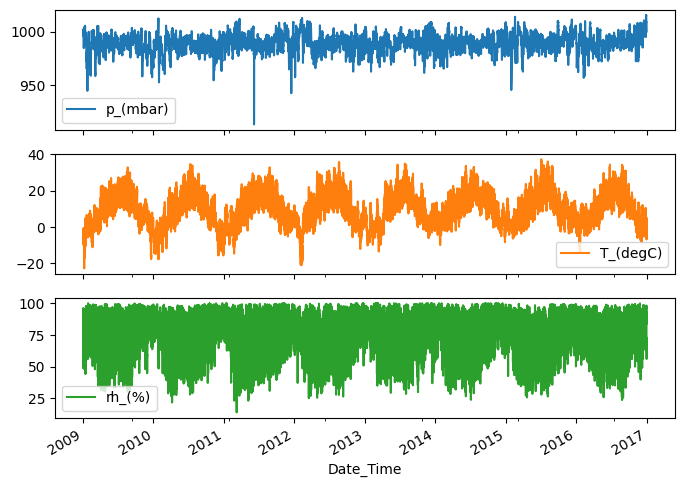

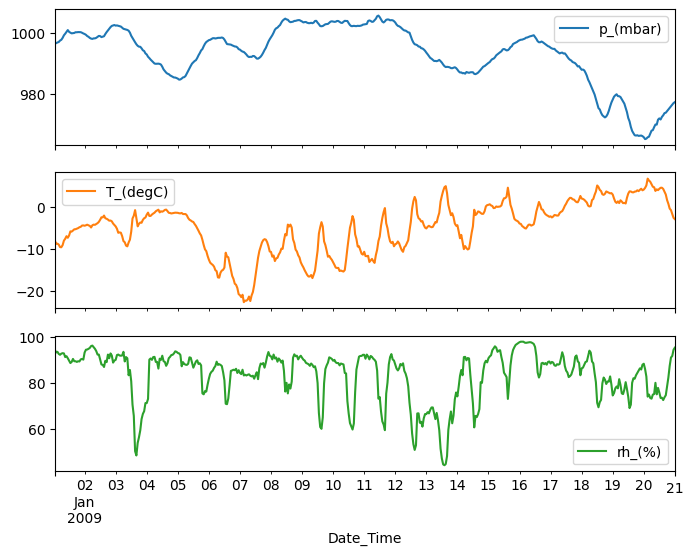

In [4]:
date_time = pd.to_datetime(df['Date_Time'], format='%d.%m.%Y %H:%M:%S')
# Plot der relevanten Wetterdaten
plot_cols = [ 'p_(mbar)', 'T_(degC)', 'rh_(%)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
# Plot der relevanten Wetterdaten (subsampling)
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p_(mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T_(degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot_(K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew_(degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh_(%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax_(mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact_(mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef_(mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh_(g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC_(mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [6]:
# -9999.00 bei der Windgeschwindigkeit ist fehlerhaft
wv = df['wv_(m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max._wv_(m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

df['wv_(m/s)'].min()

0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

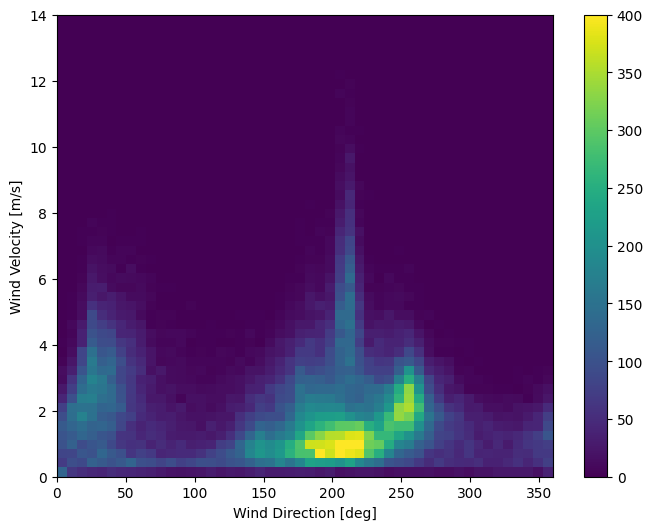

In [7]:
# Gibt die Windrichtung in der Einheit Grad an. 

plt.hist2d(df['wd_(deg)'], df['wv_(m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

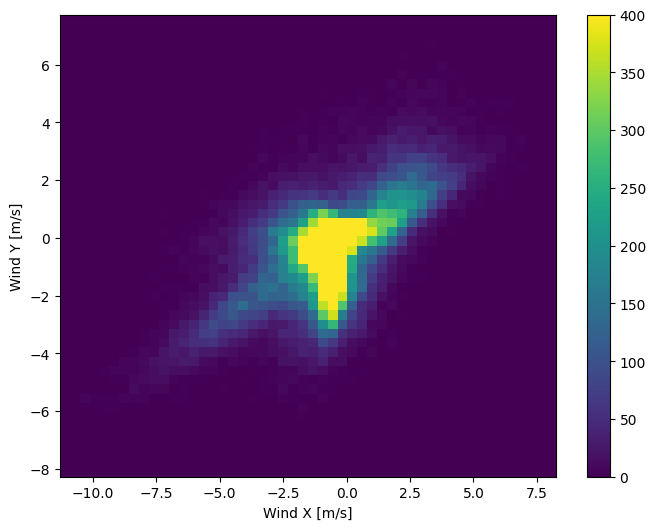

In [8]:
# Winkel sind keine guten Modelleingaben: 360° und 0° sollten nahe beieinander liegen und sich reibungslos umschließen
    
wv = df.pop('wv_(m/s)')
max_wv = df.pop('max._wv_(m/s)')

# Konvertierung zum Bogenmaß
wd_rad = df.pop('wd_(deg)')*np.pi / 180

# x und y ausrechnen
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# max von x und y ausrechnen
df['max_Wx'] = max_wv*np.cos(wd_rad)
df['max_Wy'] = max_wv*np.sin(wd_rad)

plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

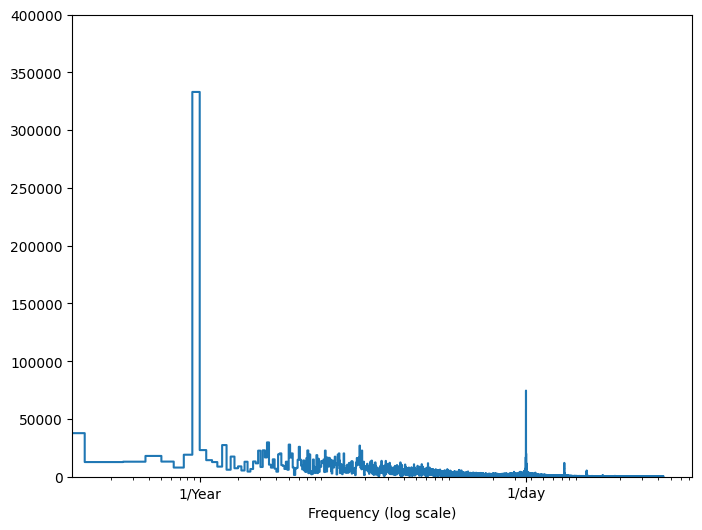

In [9]:
# Durch das anwenden der FFT kann man schauen welche Frequenzen wichtig sind
fft = tf.signal.rfft(df['T_(degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T_(degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [10]:
# Die FFT zeigt starke peaks bei einem Jahr und bei einem Tag, was zu einer Aussage führt, dass Wetterdaten eine klare tägliche und jährliche Periodizität hat.
# Umformen der Datensätze in Tage bzw Jahre Perioden ist von Vorteil um am Effizientesten zu trainieren.
df

,Date_Time,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh_(%),VPmax_(mbar),VPact_(mbar),VPdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),Wx,Wy,max_Wx,max_Wy
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603,-0.190000,-0.329090
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292,-0.810044,0.343843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,-0.855154,-0.160038,-1.336792,-0.250174
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,-0.716196,-0.726267,-1.348134,-1.367090
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,-0.661501,0.257908,-1.453438,0.566672
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,-0.280621,-0.209169,-0.545207,-0.406385


In [11]:
df.to_csv("data/weather_data_filtered.csv", index=False)

In [12]:
#Datensätze aufteilen (verschiedene Abtastraten)
import json
from typing import List
from pathlib import Path

In [13]:
#Funktionen um Zeit-Feature hinzuzufügen
def add_date_cols(dataframe: pd.DataFrame, date_col: str, frequency: str):
    """
    Add time features like month, week of the year ...
    :param dataframe:
    :param date_col:
    :param frequency: The desired frequency for resampling, e.g., '2H', '4H', 'D', 'W', 'M'
    :return:
    """
    dataframe[date_col] = pd.to_datetime(dataframe[date_col], format="%d.%m.%Y %H:%M:%S")

    resampled_df = dataframe.set_index(date_col).resample(frequency).mean()

    resampled_df["day_of_month"] = resampled_df.index.day / 31
    resampled_df["day_of_year"] = resampled_df.index.dayofyear / 365
    resampled_df["month"] = resampled_df.index.month / 12
    resampled_df["week_of_year"] = resampled_df.index.isocalendar().week / 53

    first_year = resampled_df.index.year.min()  # Änderung hier: Verwendung von min() statt iloc[0]
    last_year = resampled_df.index.year.max()   # Änderung hier: Verwendung von max() statt iloc[-1]
    resampled_df["year"] = (resampled_df.index.year - first_year) / (last_year - first_year)

    return resampled_df.reset_index(), resampled_df.columns


def add_basic_lag_features(dataframe: pd.DataFrame, group_by_cols: List, col_names: List, horizons: List, fill_na=True):
    """
    Computes simple lag features
    :param dataframe:
    :param group_by_cols:
    :param col_names:
    :param horizons:
    :param fill_na:
    :return:
    """
    group_by_data = dataframe.groupby(by=group_by_cols)

    new_cols = []

    for horizon in horizons:
        dataframe[[a + "_lag_%s" % horizon for a in col_names]] = group_by_data[col_names].shift(periods=horizon)
        new_cols += [a + "_lag_%s" % horizon for a in col_names]

    if fill_na:
        dataframe[new_cols] = dataframe[new_cols].fillna(0)

    return dataframe, new_cols


def process_df(dataframe: pd.DataFrame, group_by: List, target_col: List, frequency: str):
    """
    :param dataframe:
    :param target_col:
    :param frequency: The desired frequency for resampling, e.g., '2H', '4H', 'D', 'W', 'M'
    :return:
    """
    resampled_df, new_cols = add_date_cols(dataframe, date_col="Date_Time", frequency=frequency)
    resampled_df, lag_cols = add_basic_lag_features(
        dataframe=resampled_df, group_by_cols=group_by, col_names=target_col, horizons=[1]
    )

    return resampled_df, new_cols

In [14]:
csv_path = "data/weather_data_filtered.csv"
target = ['p_(mbar)', 'T_(degC)']
group_by = ["day_of_year"]
data_org = pd.read_csv(csv_path)
frequency_list = ['1H', '2H','4H','6H','12H', 'D', 'W', 'M']



In [18]:
def interpolate_nan_inf(df):
    # Ersetze Inf-Werte durch NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Interpoliere NaN-Werte
    for column in df.columns:
        if df[column].dtype == np.float64 or df[column].dtype == np.int64:
            df[column] = pd.to_numeric(df[column], errors='coerce')
            df[column] = df[column].interpolate(method='linear', inplace=False)
    
    return df

In [19]:
for freq in frequency_list:
    data, cols = process_df(dataframe=data_org, group_by=group_by, target_col=target,frequency=freq)
    out_path = "data/processed_weather_data_{}.csv".format(freq)
    config_path = "data/config_{}.json".format(freq)
    int_data = interpolate_nan_inf(data)
    int_data.to_csv(out_path, index=False)

    config = {
        "features": cols.tolist(),
        "target": target,
        "group_by_key": group_by,
        "lag_features": [weather + "_lag_1" for weather in target],
        "epochs":  5,
        "batch_size": 2048,
        "horizon_size": 30,
        "channels": 8,
        "lr": 1e-3,
        "dropout": 0.1
    }

    with open(config_path, "w") as f:
        json.dump(config, f, indent=4)

In [ ]:

# Datensatz verändern
csv_path = "data/processed_weather_data.csv"
data = pd.read_csv(csv_path)
data.columns

In [ ]:

data["Date_Time"] = pd.to_datetime(data["Date_Time"], format="%Y-%m-%d %H:%M:%S")
data.set_index('Date_Time', inplace=True)

In [ ]:
df_monthly = data.resample('M').mean()
df_monthly.reset_index(inplace=True)
df_monthly.columns

In [ ]:
out_path = "data/processed_weather_data_monthly.csv"
df_monthly.to_csv(out_path, index=False)